# Load and Import Libraries

In [2]:
import hashlib
from PIL import Image
import imagehash
import os
import datetime
import pandas as pd
import numpy as np  # Add this import to resolve the error
import matplotlib.pyplot as plt  # You also need to import matplotlib for plotting
import pprint
from IPython.display import display
import seaborn as sns

# Load Images from Directory and Compute Cryptographic Hash Methods Implemented and Tested

## Function to Load Images from Directory

In [5]:
def load_images_from_directory(directory_path):
    images = []
    failed_files = []  # To track files that couldn't be loaded
    
    # List all files in the directory
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        
        # Check if the file is an image (based on file extension)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            try:
                # Open the image using Pillow
                img = Image.open(file_path)
                img.verify()  # Verify the image file integrity
                images.append(file_path)  # Save the file path instead of the image object
                print(f"Loaded: {filename}")
            except Exception as e:
                failed_files.append((filename, str(e)))
                print(f"Error loading {filename}: {e}")
    
    # Summary
    print("\nSummary:")
    print(f"Total images loaded: {len(images)}")
    print(f"Failed to load: {len(failed_files)}")
    if failed_files:
        print("\nFailed Files:")
        for file, error in failed_files:
            print(f"{file}: {error}")
    
    return images


## Function to Compute Cryptographic Hashes

In [7]:
# Function to compute SHA-256 hash for an image
def compute_cryptographic_hash(image_path):
    hash_sha256 = hashlib.sha256()  # Initialize SHA-256 hash object
    
    try:
        # Open the image file in binary mode
        with open(image_path, 'rb') as img_file:
            # Read the image in chunks to avoid memory issues with large files
            while chunk := img_file.read(8192):
                hash_sha256.update(chunk)  # Update the hash with each chunk of data
        
        return hash_sha256.hexdigest()  # Return the hexadecimal representation of the hash
    
    except Exception as e:
        print(f"Error computing hash for {image_path}: {e}")
        return None


## Testing of Loaded Image and Cryptographic Hash

In [9]:
# Directory path where images are stored
directory_path = r"C:\APPU SELVA\Pongal 2024"

# Load the images from the directory
image_paths = load_images_from_directory(directory_path)


Loaded: 1.JPG
Loaded: 10.JPG
Loaded: 11.JPG
Loaded: 12.JPG
Loaded: 13.JPG
Loaded: 14.JPG
Loaded: 15.JPG
Loaded: 16.JPG
Loaded: 17.JPG
Loaded: 18.JPG
Loaded: 19.JPG
Loaded: 2.JPG
Loaded: 20.JPG
Loaded: 21.JPG
Loaded: 22.JPG
Loaded: 23.JPG
Loaded: 24.JPG
Loaded: 25.JPG
Loaded: 26.JPG
Loaded: 27.JPG
Loaded: 28.JPG
Loaded: 29.jpg
Loaded: 3.JPG
Loaded: 30.jpg
Loaded: 31.jpg
Loaded: 32.jpg
Loaded: 33.jpg
Loaded: 34.jpg
Loaded: 35.jpg
Loaded: 36.jpg
Loaded: 4.JPG
Loaded: 5.JPG
Loaded: 6.JPG
Loaded: 7.JPG
Loaded: 8.JPG
Loaded: 9.JPG

Summary:
Total images loaded: 36
Failed to load: 0


In [10]:
# Compute hash for each image and print
cryptographic_hashes = {}
for image_path in image_paths:
    img_hash = compute_cryptographic_hash(image_path)
    if img_hash:
        cryptographic_hashes[image_path] = img_hash
        print(f"Hash for {image_path}: {img_hash}")

# Example: Display all computed hashes
if cryptographic_hashes:
    print("Image hashes could be computed:")
else:
    print("No images found or hashes could not be computed.")


Hash for C:\APPU SELVA\Pongal 2024\1.JPG: 996ce849caeadbf443bb6548328a3bbafca706764781d0ce8b102033ba0be275
Hash for C:\APPU SELVA\Pongal 2024\10.JPG: fdbff04aa67fb27a698c05ec5e078c748d179a3a025a6586c5dfa7719405963f
Hash for C:\APPU SELVA\Pongal 2024\11.JPG: 47f4c47164bdfee455abeba76a584faf7b93b3d7a8b0d591f49297564fe55550
Hash for C:\APPU SELVA\Pongal 2024\12.JPG: 52e2264efc20f30ed22e597fdc101a32abe49ad35caa50b5574f557b57ada2f1
Hash for C:\APPU SELVA\Pongal 2024\13.JPG: aeca0dbf151c1ad48aa7614c3e7d43a36f924b0d837279d1708ea08445127c05
Hash for C:\APPU SELVA\Pongal 2024\14.JPG: 9d4d09b67c8411da7a4a77e723a066d4132e3d40eb58a889bac735932e290f04
Hash for C:\APPU SELVA\Pongal 2024\15.JPG: 9b612ba5621b26555064820bac8122c80049d543f6027763ed65054ffddb34cd
Hash for C:\APPU SELVA\Pongal 2024\16.JPG: 35815d19ad24b554dd2468aaba5baec36809b15c787aea8c9c1c005e6078c9fd
Hash for C:\APPU SELVA\Pongal 2024\17.JPG: 122ec5b8da7e776e1bbcbd3a42eea8acf1bab317134eeffdaf48881402f904c5
Hash for C:\APPU SELVA\Pongal

## Function to Compute Perceptual Hashes

In [12]:
# Function to compute perceptual hash for an image
def compute_perceptual_hash(image):
    try:
        # Convert image to RGB (in case it's not in RGB format)
        image = image.convert('RGB')
        
        # Compute the perceptual hash using average hash method
        perceptual_hash = imagehash.average_hash(image)
        
        return perceptual_hash
    
    except Exception as e:
        print(f"Error computing perceptual hash: {e}")
        return None


In [13]:
# Print perceptual hashes for all images
perceptual_hashes = {}
for image_path in image_paths:
    try:
        # Open the image using Pillow
        with Image.open(image_path) as img:
            # Compute perceptual hash for the image
            perceptual_hash = compute_perceptual_hash(img)
            if perceptual_hash:
                perceptual_hashes[image_path] = perceptual_hash
                print(f"Perceptual hash for {image_path}: {perceptual_hash}")
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")


Perceptual hash for C:\APPU SELVA\Pongal 2024\1.JPG: defefae0c2c1c0cc
Perceptual hash for C:\APPU SELVA\Pongal 2024\10.JPG: 860c58f830733074
Perceptual hash for C:\APPU SELVA\Pongal 2024\11.JPG: 860c58f830733074
Perceptual hash for C:\APPU SELVA\Pongal 2024\12.JPG: ccf0f8fc8c8680c0
Perceptual hash for C:\APPU SELVA\Pongal 2024\13.JPG: 004000026f7e1eff
Perceptual hash for C:\APPU SELVA\Pongal 2024\14.JPG: 004040026f7e1eff
Perceptual hash for C:\APPU SELVA\Pongal 2024\15.JPG: 0040c0023f5e3eff
Perceptual hash for C:\APPU SELVA\Pongal 2024\16.JPG: 0040c0023f1e3eff
Perceptual hash for C:\APPU SELVA\Pongal 2024\17.JPG: 004080023f1e3eff
Perceptual hash for C:\APPU SELVA\Pongal 2024\18.JPG: 008080007e1e3eff
Perceptual hash for C:\APPU SELVA\Pongal 2024\19.JPG: 008080804e7e3c7f
Perceptual hash for C:\APPU SELVA\Pongal 2024\2.JPG: e2e6ccccc999b818
Perceptual hash for C:\APPU SELVA\Pongal 2024\20.JPG: 00006060607efefe
Perceptual hash for C:\APPU SELVA\Pongal 2024\21.JPG: 000060606c7c7c7c
Perceptu

## Creating Instances of Images and Computing Perceptual Hashes

In [15]:
# Function to create three instances of an image and compute perceptual hashes
def create_image_instances_and_hashes(image, compute_perceptual_hash):
    # Instance 1: Rotate the image by 15 degrees clockwise
    rotation_15degrees_Clockwise = image.rotate(15, resample=Image.NEAREST)
    # Compute perceptual hash for the rotated image
    hash_rotation_15degrees_Clockwise = compute_perceptual_hash(rotation_15degrees_Clockwise)
    
    # Instance 2: Rotate the image by -15 degrees (counter-clockwise)
    rotation_15degrees_CounterClockwise = image.rotate(-15, resample=Image.NEAREST)
    # Compute perceptual hash for the rotated image
    hash_rotation_15degrees_CounterClockwise = compute_perceptual_hash(rotation_15degrees_CounterClockwise)
    
    # Instance 3: Apply a shear transformation with minimal difference
    width, height = image.size
    shear_matrix = (1, 0.05, 0, 0.05, 1, 0)  # Minimal shearing transformation matrix
    Shear_Low_Difference = image.transform((width, height), Image.AFFINE, shear_matrix, resample=Image.NEAREST)
    # Compute perceptual hash for the sheared image
    hash_Shear_Low_Difference = compute_perceptual_hash(Shear_Low_Difference)
    
    return {
        "rotation_15degrees_Clockwise": hash_rotation_15degrees_Clockwise,
        "rotation_15degrees_CounterClockwise": hash_rotation_15degrees_CounterClockwise,
        "Shear_Low_Difference": hash_Shear_Low_Difference
    }


In [16]:
# Create an empty list to store the data for the table
hash_table_data = []

# Loop through each image and compute the perceptual hashes for its instances
for image_path in image_paths:
    with Image.open(image_path) as img:
        # Create the instances and compute perceptual hashes
        image_hashes = create_image_instances_and_hashes(img, compute_perceptual_hash)
        
        # Add the data to the table
        hash_table_data.append({
            "FileName": image_path,
            "Perceptual HashValue_rotation_15degrees_Clockwise": image_hashes["rotation_15degrees_Clockwise"],
            "Perceptual HashValue_rotation_15degrees_CounterClockwise": image_hashes["rotation_15degrees_CounterClockwise"],
            "Perceptual HashValue_Shear_Low_Difference": image_hashes["Shear_Low_Difference"]
        })

# Convert the data into a pandas DataFrame for easy viewing
df = pd.DataFrame(hash_table_data)

# Display the table
df.head(10)


,FileName,Perceptual HashValue_rotation_15degrees_Clockwise,Perceptual HashValue_rotation_15degrees_CounterClockwise,Perceptual HashValue_Shear_Low_Difference
0,C:\APPU SELVA\Pongal 2024\1.JPG,1e7ef0e3e1e1e660,787effe3c0c2c20a,fefee0e0c2c0c4c0
1,C:\APPU SELVA\Pongal 2024\10.JPG,0e1818f8f3307a38,00667d3870707222,8708d8f032f37060
2,C:\APPU SELVA\Pongal 2024\11.JPG,0e0818f8f3307a38,00667d3870707222,8608d8f030723060
3,C:\APPU SELVA\Pongal 2024\12.JPG,08e0f8fce680c0c0,7474f89c8c8c4402,e0f8f8ec8c8280c0
4,C:\APPU SELVA\Pongal 2024\13.JPG,0000c3c70f7f7f3c,606000406eff7e3e,004000074f7e3fbc
5,C:\APPU SELVA\Pongal 2024\14.JPG,0000c3c70f7f7f3c,606000406eff7e3e,004000074f7e3fbc
6,C:\APPU SELVA\Pongal 2024\15.JPG,0000c2c79e3f1f3c,404000607ebefe3c,0040c0067e1e3efc
7,C:\APPU SELVA\Pongal 2024\16.JPG,0000c2c77e3f1f3c,404000607ebefe3c,004080067e1e3efc
8,C:\APPU SELVA\Pongal 2024\17.JPG,000082873e3f1f3c,404000605ebe7e3c,004080067e1e3ffe
9,C:\APPU SELVA\Pongal 2024\18.JPG,000080869e7e1f3c,404000603ebefe3c,008080067e3c7efc


# Defining and Utilizing SQL ALCHEMY to Store Image Data into Database

In [18]:
pip install sqlalchemy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
pip install --upgrade pip


  Using cached pip-25.0-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


In [19]:
# image_metadata_db.py
from sqlalchemy import create_engine, MetaData, Column, Integer, String, Float, DateTime
from sqlalchemy.orm import declarative_base, sessionmaker


In [20]:
# Initialize the base class for the ORM
Base = declarative_base()

# Define the database schema
class ImageMetadata(Base):
    __tablename__ = 'image_metadata'

    ID = Column(Integer, primary_key=True, nullable=False)
    filename = Column(String, nullable=False)
    cryptographic_hash = Column(String, nullable=False)
    perceptual_hash = Column(String, nullable=False)
    file_location = Column(String, nullable=False)
    file_size = Column(Float, nullable=False)
    image_width = Column(Integer, nullable=False)
    image_height = Column(Integer, nullable=False)
    file_creation_date = Column(DateTime, nullable=False)
    file_extension = Column(String, nullable=False)
    perceptual_hash_rotation_15degrees_cw = Column(String, nullable=False)
    perceptual_hash_rotation_15degrees_ccw = Column(String, nullable=False)
    perceptual_hash_shear_low_difference = Column(String, nullable=False)

# Initialize the database
def initialize_db(db_name):
    engine = create_engine(f'sqlite:///{db_name}')  # SQLite database
    Base.metadata.create_all(engine)
    Session = sessionmaker(bind=engine)
    return Session()


def check_db_creation(db_name):
    # Check if the database file exists
    db_path = os.path.abspath(db_name)
    if os.path.exists(db_path):
        print(f"Database '{db_name}' exists at: {db_path}")
    else:
        print(f"Database '{db_name}' does not exist. It may not have been created yet.")
    return db_path


# Function to add image metadata
def insert_image_metadata(session, image_metadata):
    session.add(image_metadata)
    session.commit()


def clear_existing_data(session):
    session.query(ImageMetadata).delete()
    session.commit()

In [21]:
# Initialize the database session
db_name = "image_metadata.db"
session = initialize_db(db_name)
# Check if the database is created and get its path
db_path = check_db_creation(db_name)

# Clear data before inserting new records
clear_existing_data(session)

# Function to process images and populate the database
def process_images_and_populate_db(session, image_paths, cryptographic_hashes, perceptual_hashes, compute_perceptual_hash):
    
    if not image_paths:
        print("No images found in the specified directory.")
        return

    idx = 1
    for image_path in image_paths:
        try:
            with Image.open(image_path) as img:
                # Retrieve cryptographic hash 
                cryptographic_hash = cryptographic_hashes.get(image_path, compute_cryptographic_hash(image_path))


                # Retrieve perceptual hash 
                perceptual_hash = str(perceptual_hashes.get(image_path, 'NA'))

                print(f"Image Path: {image_path}, Cryptographic Hash: {cryptographic_hash}, Perceptual Hash: {perceptual_hash}")
                
                # Generate transformed perceptual hash values (mock data for now)
                image_hashes = create_image_instances_and_hashes(img, compute_perceptual_hash)
                ph_rot_15deg_cw = str(image_hashes.get("rotation_15degrees_Clockwise", 'NA'))
                ph_rot_15deg_ccw = str(image_hashes.get("rotation_15degrees_CounterClockwise", 'NA'))
                ph_shear_ld = str(image_hashes.get("Shear_Low_Difference", 'NA'))

                # Retrieve file metadata
                file_location = os.path.abspath(image_path)
                file_size = os.path.getsize(image_path)
                width, height = img.size
                creation_date = datetime.datetime.fromtimestamp(os.path.getctime(image_path))
                file_extension = os.path.splitext(image_path)[1].lower()

                # Create a metadata object
                image_metadata = ImageMetadata(
                    filename=os.path.basename(image_path),
                    cryptographic_hash=cryptographic_hash,
                    perceptual_hash=perceptual_hash,
                    file_location=file_location,
                    file_size=file_size,
                    image_width=width,
                    image_height=height,
                    file_creation_date=creation_date,
                    file_extension=file_extension,
                    perceptual_hash_rotation_15degrees_cw=ph_rot_15deg_cw,
                    perceptual_hash_rotation_15degrees_ccw=ph_rot_15deg_ccw,
                    perceptual_hash_shear_low_difference=ph_shear_ld
                )

                # Insert into the database using the imported function
                insert_image_metadata(session, image_metadata)
                print(f"Inserted metadata for {image_path} into database.")
                idx += 1

        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

process_images_and_populate_db(session, image_paths, cryptographic_hashes, perceptual_hashes, compute_perceptual_hash)

# Connect to the SQLite database
db_file = "image_metadata.db"
engine = create_engine(f"sqlite:///{db_file}")

# Reflect the database schema
metadata = MetaData()
metadata.reflect(bind=engine)

# Print available tables
print("Tables in the database:", metadata.tables.keys())

# Access a specific table
table_name = "image_metadata"  # Replace with your table name
if table_name in metadata.tables:
    table = metadata.tables[table_name]
else:
    raise ValueError(f"Table '{table_name}' does not exist in the database.")

# Query the table and print results
with engine.connect() as connection:
    result = connection.execute(table.select())
    for row in result:
        print(row)


Database 'image_metadata.db' exists at: C:\Users\selva\image_metadata.db
Image Path: C:\APPU SELVA\Pongal 2024\1.JPG, Cryptographic Hash: 996ce849caeadbf443bb6548328a3bbafca706764781d0ce8b102033ba0be275, Perceptual Hash: defefae0c2c1c0cc
Inserted metadata for C:\APPU SELVA\Pongal 2024\1.JPG into database.
Image Path: C:\APPU SELVA\Pongal 2024\10.JPG, Cryptographic Hash: fdbff04aa67fb27a698c05ec5e078c748d179a3a025a6586c5dfa7719405963f, Perceptual Hash: 860c58f830733074
Inserted metadata for C:\APPU SELVA\Pongal 2024\10.JPG into database.
Image Path: C:\APPU SELVA\Pongal 2024\11.JPG, Cryptographic Hash: 47f4c47164bdfee455abeba76a584faf7b93b3d7a8b0d591f49297564fe55550, Perceptual Hash: 860c58f830733074
Inserted metadata for C:\APPU SELVA\Pongal 2024\11.JPG into database.
Image Path: C:\APPU SELVA\Pongal 2024\12.JPG, Cryptographic Hash: 52e2264efc20f30ed22e597fdc101a32abe49ad35caa50b5574f557b57ada2f1, Perceptual Hash: ccf0f8fc8c8680c0
Inserted metadata for C:\APPU SELVA\Pongal 2024\12.JPG 

# Export MetaData to Excel File

In [23]:
import sqlite3 
def export_db_to_excel(db_name, excel_file_name):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_name)
    
    # Query all data from the table
    query = "SELECT * FROM image_metadata"
    df = pd.read_sql_query(query, conn)
    
    # Export to Excel
    excel_file_path = f"{excel_file_name}.xlsx"
    df.to_excel(excel_file_path, index=False)
    conn.close()
    
    print(f"Database exported successfully to {excel_file_path}")
    return excel_file_path

# Export the database to an Excel file
db_name = 'image_metadata.db'
excel_file_name = 'image_metadata_export'
excel_file_path = export_db_to_excel(db_name, excel_file_name)


Database exported successfully to image_metadata_export.xlsx


# Storing Image Hashes as Dictionary with the Cryptographic Hashes as Key

In [25]:
# Dictionary to store perceptual hash data
perceptual_hash_data = {}

# Loop through images and populate the dictionary
for image_path in image_paths:
    try:
        # Retrieve the cryptographic hash
        cryptographic_hash = cryptographic_hashes.get(image_path, 'NA')
        
        # Retrieve the perceptual hash
        perceptual_hash = str(perceptual_hashes.get(image_path, 'NA'))
        
        # Retrieve transformed perceptual hashes
        with Image.open(image_path) as img:
            image_hashes = create_image_instances_and_hashes(img, compute_perceptual_hash)
            ph_rot_15deg_cw = str(image_hashes.get("rotation_15degrees_Clockwise", 'N/A'))
            ph_rot_15deg_ccw = str(image_hashes.get("rotation_15degrees_CounterClockwise", 'N/A'))
            ph_shear_ld = str(image_hashes.get("Shear_Low_Difference", 'N/A'))
        
        # Store the data in the dictionary
        perceptual_hash_data[cryptographic_hash] = {
            "Perceptual_Hash": perceptual_hash,
             "Perceptual_Hash_rotation_15degrees_Clockwise": ph_rot_15deg_cw,
             "Perceptual_Hash_rotation_15degrees_CounterClockwise": ph_rot_15deg_ccw,
             "Perceptual_Hash_Shear_Low_Difference": ph_shear_ld
        }
        
        print(f"Stored perceptual hash data for {image_path}.")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

# Display the resulting dictionary
print("Perceptual Hash Data Dictionary:")
print(perceptual_hash_data)


Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\1.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\10.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\11.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\12.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\13.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\14.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\15.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\16.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\17.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\18.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\19.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\2.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\20.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\21.JPG.
Stored perceptual hash data for C:\APPU SELVA\Pongal 2024\22.JPG.
Stored perce

In [26]:
# # Dictionary to store perceptual hash data
# perceptual_hash_data = {}

# # Loop through images and populate the dictionary
# for image_path in image_paths:
#     try:
#         # Use the filename as the primary key (you can extract it from the image_path)
#         filename = image_path.split("\\")[-1]  # Extracts the filename from the path
        
#         # Retrieve the  perceptual hash
        
#         perceptual_hash = str(perceptual_hashes.get(image_path, 'NA'))
        
#         # Retrieve transformed perceptual hashes
#         with Image.open(image_path) as img:
#             image_hashes = create_image_instances_and_hashes(img, compute_perceptual_hash)
#             ph_rot_15deg_cw = str(image_hashes.get("rotation_15degrees_Clockwise", 'N/A'))
#             ph_rot_15deg_ccw = str(image_hashes.get("rotation_15degrees_CounterClockwise", 'N/A'))
#             ph_shear_ld = str(image_hashes.get("Shear_Low_Difference", 'N/A'))
        
#         # Store the data in the dictionary, using the filename as the key
#         perceptual_hash_data[filename] = {
#             "Perceptual_Hash": perceptual_hash,
#             "Perceptual_Hash_rotation_15degrees_Clockwise": ph_rot_15deg_cw,
#             "Perceptual_Hash_rotation_15degrees_CounterClockwise": ph_rot_15deg_ccw,
#             "Perceptual_Hash_Shear_Low_Difference": ph_shear_ld
#         }
        
#         print(f"Stored perceptual hash data for {filename}.")
#     except Exception as e:
#         print(f"Error processing image {image_path}: {e}")

# # Display the resulting dictionary
# print("Perceptual Hash Data Dictionary:")
# print(perceptual_hash_data)


# Using the Pretty Method in Rich function to Print Data base

In [28]:
from rich import pretty
from rich.console import Console

In [29]:
#Using the pretty print to print the dictionary
#Create a console object for pretty printing
console = Console()

#Pretty print dictionary using rich.pretty
pretty.install() #Automatically sets up rich.pretty for easier usage
console.print(perceptual_hash_data)


{
    '996ce849caeadbf443bb6548328a3bbafca706764781d0ce8b102033ba0be275': {
        'Perceptual_Hash': 'defefae0c2c1c0cc',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '1e7ef0e3e1e1e660',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '787effe3c0c2c20a',
        'Perceptual_Hash_Shear_Low_Difference': 'fefee0e0c2c0c4c0'
    },
    'fdbff04aa67fb27a698c05ec5e078c748d179a3a025a6586c5dfa7719405963f': {
        'Perceptual_Hash': '860c58f830733074',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '0e1818f8f3307a38',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '00667d3870707222',
        'Perceptual_Hash_Shear_Low_Difference': '8708d8f032f37060'
    },
    '47f4c47164bdfee455abeba76a584faf7b93b3d7a8b0d591f49297564fe55550': {
        'Perceptual_Hash': '860c58f830733074',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '0e0818f8f3307a38',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '00667d3870707222',
        'Perceptual_Hash_Shear_Low_Difference': '8608d8f030723060'
    },
    '52e2264efc20f30ed22e597fdc101a32abe49ad35caa50b5574f557b57ada2f1': {
        'Perceptual_Hash': 'ccf0f8fc8c8680c0',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '08e0f8fce680c0c0',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '7474f89c8c8c4402',
        'Perceptual_Hash_Shear_Low_Difference': 'e0f8f8ec8c8280c0'
    },
    'aeca0dbf151c1ad48aa7614c3e7d43a36f924b0d837279d1708ea08445127c05': {
        'Perceptual_Hash': '004000026f7e1eff',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '0000c3c70f7f7f3c',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '606000406eff7e3e',
        'Perceptual_Hash_Shear_Low_Difference': '004000074f7e3fbc'
    },
    '9d4d09b67c8411da7a4a77e723a066d4132e3d40eb58a889bac735932e290f04': {
        'Perceptual_Hash': '004040026f7e1eff',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '0000c3c70f7f7f3c',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '606000406eff7e3e',
        'Perceptual_Hash_Shear_Low_Difference': '004000074f7e3fbc'
    },
    '9b612ba5621b26555064820bac8122c80049d543f6027763ed65054ffddb34cd': {
        'Perceptual_Hash': '0040c0023f5e3eff',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '0000c2c79e3f1f3c',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '404000607ebefe3c',
        'Perceptual_Hash_Shear_Low_Difference': '0040c0067e1e3efc'
    },
    '35815d19ad24b554dd2468aaba5baec36809b15c787aea8c9c1c005e6078c9fd': {
        'Perceptual_Hash': '0040c0023f1e3eff',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '0000c2c77e3f1f3c',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '404000607ebefe3c',
        'Perceptual_Hash_Shear_Low_Difference': '004080067e1e3efc'
    },
    '122ec5b8da7e776e1bbcbd3a42eea8acf1bab317134eeffdaf48881402f904c5': {
        'Perceptual_Hash': '004080023f1e3eff',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '000082873e3f1f3c',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '404000605ebe7e3c',
        'Perceptual_Hash_Shear_Low_Difference': '004080067e1e3ffe'
    },
    'b2a7450ed75df87213f258c6ef65ab184041e9df2b86d89c0b5425c9bdfa51d6': {
        'Perceptual_Hash': '008080007e1e3eff',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '000080869e7e1f3c',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '404000603ebefe3c',
        'Perceptual_Hash_Shear_Low_Difference': '008080067e3c7efc'
    },
    '9cdc13cf8e07b8dea37c020baaa611cec43671180a1d1d49ce808f1fe03cd0f3': {
        'Perceptual_Hash': '008080804e7e3c7f',
        'Perceptual_Hash_rotation_15degrees_Clockwise': '000001868e7e7f3c',
        'Perceptual_Hash_rotation_15degrees_CounterClockwise': '80800040f43f7e3c',
        'Perceptual_Hash_Shear_Low_Difference': '008080857e7c3c7c'
    },
    'fbd9937473359a062bc0da019866458eeb2afb15150a14e793da977fef407672': {
        'Perceptual_Hash': 'e2

## Implementing Function to Calculate Pairwise Hamming Distances between Image Pairs

In [31]:
from functools import cache
# Function to calculate Hamming distance
@cache  # Cache this function only if its arguments are hashable
def calculate_hamming_distance(hash1, hash2):
    return hash1 - hash2  # Replace with actual logic for Hamming distance

# Function to compute pairwise Hamming distance for all images
def compute_pairwise_hamming_distances(perceptual_hash_data):
    pairwise_distances = {}

    # Get a list of filenames (keys) in the dictionary
    keys = list(perceptual_hash_data.keys())
    
    # Iterate through each pair of images
    for i in range(len(keys)):
        for j in range(i + 1, len(keys)):
            image_A = keys[i]
            image_B = keys[j]
            
            # Extract perceptual hash values for image A and B
            ph_A = perceptual_hash_data[image_A]
            ph_B = perceptual_hash_data[image_B]
            
            # List of perceptual hashes for image A and image B
            ph_A_values = [
                imagehash.hex_to_hash(ph_A["Perceptual_Hash"]),
                imagehash.hex_to_hash(ph_A["Perceptual_Hash_rotation_15degrees_Clockwise"]),
                imagehash.hex_to_hash(ph_A["Perceptual_Hash_rotation_15degrees_CounterClockwise"]),
                imagehash.hex_to_hash(ph_A["Perceptual_Hash_Shear_Low_Difference"])
            ]
            
            ph_B_values = [
                imagehash.hex_to_hash(ph_B["Perceptual_Hash"]),
                imagehash.hex_to_hash(ph_B["Perceptual_Hash_rotation_15degrees_Clockwise"]),
                imagehash.hex_to_hash(ph_B["Perceptual_Hash_rotation_15degrees_CounterClockwise"]),
                imagehash.hex_to_hash(ph_B["Perceptual_Hash_Shear_Low_Difference"])
            ]
            
            # Compute pairwise Hamming distances between A and B's perceptual hashes
            min_distance = float('inf')  # Start with a large value
            
            # Compute all pairwise distances between A and B's perceptual hashes
            for ph_A_value in ph_A_values:
                for ph_B_value in ph_B_values:
                    distance = calculate_hamming_distance(ph_A_value, ph_B_value)
                    min_distance = min(min_distance, distance)
            
            # Store the minimum distance for the current pair of images
            pairwise_distances[(image_A, image_B)] = min_distance

    return pairwise_distances

# Compute pairwise Hamming distances
pairwise_hamming_distances = compute_pairwise_hamming_distances(perceptual_hash_data)

# Display the pairwise Hamming distances
print("Pairwise Hamming Distances:")
for (image_A, image_B), min_distance in pairwise_hamming_distances.items():
    print(f"Minimum Hamming Distance between {image_A} and {image_B}: {min_distance}")


Pairwise Hamming Distances:
Minimum Hamming Distance between 996ce849caeadbf443bb6548328a3bbafca706764781d0ce8b102033ba0be275 and fdbff04aa67fb27a698c05ec5e078c748d179a3a025a6586c5dfa7719405963f: 25
Minimum Hamming Distance between 996ce849caeadbf443bb6548328a3bbafca706764781d0ce8b102033ba0be275 and 47f4c47164bdfee455abeba76a584faf7b93b3d7a8b0d591f49297564fe55550: 26
Minimum Hamming Distance between 996ce849caeadbf443bb6548328a3bbafca706764781d0ce8b102033ba0be275 and 52e2264efc20f30ed22e597fdc101a32abe49ad35caa50b5574f557b57ada2f1: 18
Minimum Hamming Distance between 996ce849caeadbf443bb6548328a3bbafca706764781d0ce8b102033ba0be275 and aeca0dbf151c1ad48aa7614c3e7d43a36f924b0d837279d1708ea08445127c05: 35
Minimum Hamming Distance between 996ce849caeadbf443bb6548328a3bbafca706764781d0ce8b102033ba0be275 and 9d4d09b67c8411da7a4a77e723a066d4132e3d40eb58a889bac735932e290f04: 35
Minimum Hamming Distance between 996ce849caeadbf443bb6548328a3bbafca706764781d0ce8b102033ba0be275 and 9b612ba5621b265

# Plotting the Triangular Matrix of Images for Similarity

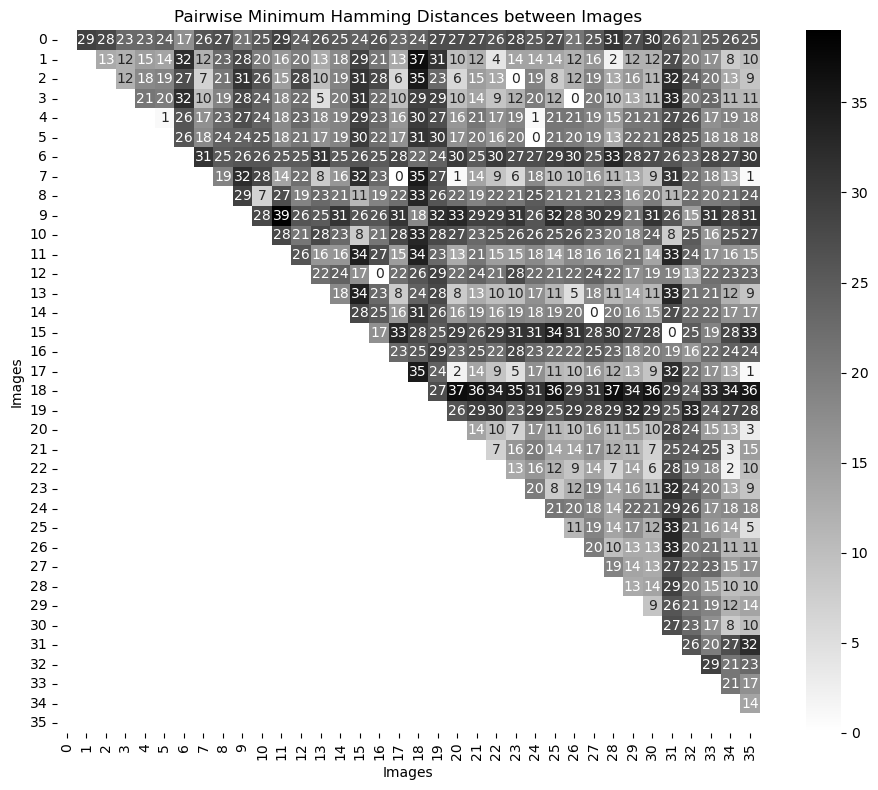

In [33]:
# Extract the keys (image pairs) and convert the pairwise distances into a matrix
keys = list(set([key[0] for key in pairwise_hamming_distances.keys()] + 
                [key[1] for key in pairwise_hamming_distances.keys()]))
distance_matrix = np.zeros((len(keys), len(keys)))

# Fill the matrix with the pairwise distances
for (image_A, image_B), distance in pairwise_hamming_distances.items():
    i = keys.index(image_A)
    j = keys.index(image_B)
    distance_matrix[i, j] = distance
    distance_matrix[j, i] = distance  # Since Hamming distance is symmetric

# Mask the lower triangular part of the matrix (set NaN for lower triangle)
mask_lower = np.tril(np.ones_like(distance_matrix, dtype=bool), k=0)  # Mask lower triangle
distance_matrix[mask_lower] = np.nan  # Set lower triangle to NaN (no annotation)

# Plot the distance matrix as a heatmap with binary color map
plt.figure(figsize=(10, 8))

# Set the color map to 'binary' and annotate only for the lower triangle
sns.heatmap(distance_matrix, 
            #xticklabels=keys, #This labels the X-axis by Cryptographic hash and confusing
            #yticklabels=keys, #Same for Y-axis
            cmap="binary", 
            annot=True, 
            annot_kws={'size': 10}, 
            cbar=True, 
            mask=mask_lower, 
            square=True)

# Adding labels and title
plt.title("Pairwise Minimum Hamming Distances between Images")
plt.xlabel("Images")
plt.ylabel("Images")

# Show the plot
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Implementing Visulaization Using StreamLit to allow GUI

In [35]:
!pip install streamlit jupyter-server-proxy



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import streamlit as st
from io import BytesIO